# ML-I  Lab 1: Visualization and Data Preprocessing 
---
#### Kris Ghimire, Thad Schwebke, Walter Lai, and Jamie Vo

### HOMICIDE 
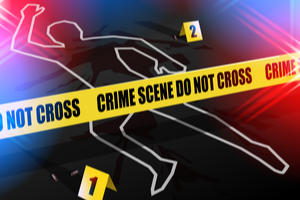

## CONTENS 

1. Business Understanding
2. Data Understanding
    <ul>
    <li><a href="#Data-Description">Data Description</a></li>
    <li><a href="#Verify-data-quality">Verify data quality</a></li>
    <li><a href="#Statistics">Statistics</a></li>
    <li><a href="#EDA">EDA</a></li>
    <li><a href="#Visualization">Visualization</a></li>
    <li><a href="#Discoveries">Discoveries</a></li>
    <li><a href="#New-Feature-Creation">New Feature Creation</a></li>
    <li><a href="#Exceptional-Work">Exceptional Work</a></li>
    </ul> 



### Business Understanding:
The Murder Accountability Project is a nonprofit organization that discovers discrepancies between the reported homicides between medical examiners and the FBI voluntary crime report. The database is considered to be one of the most exhaustive record collection of homicides that is currently avaiable for the US. Additional information about the organization can be found at Murder Accountability Project.

The dataset dates back to 1967 and includes demographic information such as gender, age, and ethnicity. A more in depth description of the attributes may be found in the Data Description section.

### <font color='#3498DB '>These are the libraries that we will be using to complete our analysis:</font> 

In [422]:
import numpy as np
import pandas as pd 
import os 
import urllib
#import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import pyplot as plt


### <font color='#3498DB '>Importing Dataset</font> 

In [31]:
df=pd.read_csv('/Users/ghimirek/Desktop/database.csv')

/Users/ghimirek/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [340]:
pd.set_option('display.max_columns', 28) # displays all columns 

In [371]:
df.tail()

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
638449,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,No,Male,30,White,Hispanic,Unknown,0.0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,Male,62,White,Unknown,Male,57.0,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Unknown,Female,22.0,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,Yes,Male,55,White,Not Hispanic,Male,31.0,White,Not Hispanic,Stranger,Knife,0,1,FBI
638453,WY01902,Rock Springs,Municipal Police,Sweetwater,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0,White,Not Hispanic,Female,24.0,White,Not Hispanic,Daughter,Blunt Object,0,1,FBI


Drop noisy features

In [372]:
if 'Record ID' in df:
    del df['Record ID']

size of dataset 

In [373]:
df.shape

(638454, 23)

### Data Description
_Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file_.

Our dataset consist of 638454 instances and 23 attributes (proerty of data)
23 attributes are: 

    1. Agency Code: The FBI has 56 field offices.Within these field offices are a total of about 380 resident agencies located in smaller cities and towns.
    2.Agency Name: Name of agency located in smaller cities and towns. 
    3. Agency Type: Municipal Police, County Police, State Police, Sheriff,
       Special Police, Regional Police and Tribal Police
    4. City: Represents the major cities where the crime had occurred.
    5. State: Represent all the states of United States
    6. Year: Represents the crime history from 1980 to 2014
    7. Month: Represents the 12 months of year of entire time. 
    8. Incident: Represents the number of incidents of crimes that is recorded by agency.
    9. Crime Type: There are two types of crime reported in this dataset: Manslaughter by Negligence and Murder or Manslaughter
    10. Crime Solved: Represents number of crime that were solved 'YES' and not solved 'NO'.
    11. Victim Sex: Represents the gender of victim which were Male, Female and Unknown. 
    12. Victim Age: Represents the age of the victims. 
    13. Victim Race: Descriptions of victims race which were White, Black,Native American/ Alaska Native, Asian/Pacific Islander and unknown.
    14. Victim Ethnicity: Describe the ethnic group of victim, Hispanic, non-Hispanic and unknown.
    15. Perpetrator Sex: Gender of a person who carries out a harmful, illegal, or immoral act, Male, Female and Unknown 
    16. Perpetrator Age: Represents age of a person who carries out a harmful, illegal, or immoral act
    17. Perpetrator Race: Represents race of a person who carries out a harmful, illegal, or immoral act which are White, Black,Native American/ Alaska Native, Asian/Pacific Islander and unknown.
    18. Perpetrator Ethnicity: Represents ethnic group of a person who carries out a harmful, illegal, or immoral act which are Hispanic, non-Hispanic and unknown.
    19. Relationship: Not sure about this???
    20. Weapon: Type of weapons that were used to commit crime which includes: Blunt Object, Strangulation, Unknown, Rifle, Knife,Firearm, Shotgun, Fall, Handgun, Drowning, Suffocation, Explosives, Fire, Drugs, Gun, Poison
    21. Victim Count: Number of people who were the victim of crime 
    22. Perpetrator Count: Number of people who where involved in criminal activities.
    23. Record Source: Data has two recording source, The Federal Bureau of Investigation (FBI) and Freedom of Information Act (FOIA) 
    24. Record ID: This is just record number and we are going to exclude this. 
    
 
### Attributes Type:
        A. Nominal Attributes: The attribute takes on names or labels that cannot be ordered.
                1. Agency Name
                2. Agency Type
                3. City
                4. State
                5. Month
                6. Crime Type
                7. Victim Race
                8.Victim Ethnicity
                9. Perpetrator Race
                10. Perpetrator Ethnicity
                11. Relationship
                12. Weapon
                13. Record Source
                14. Victim Sex
                15. Perpetrator Sex
         B. Ordinal Features: 
                 1.Year 
                 2.Agency Code
         C. Discrete:the integer features takes on a numeric value in which there are a countable number of values   
                 1. Incident 
                 2. Victim Age
                 3. Perpetrator Sex
                 4. Victim Count
                 5.Perpetrator Count
         D. Binary Features:
                 1. Crime Solved

                

#### Below is the confirmation of data type. Categorical data represented as object and quantitative attributes represented as int64 

In [374]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 23 columns):
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime Type               638454 non-null object
Crime Solved             638454 non-null object
Victim Sex               638454 non-null object
Victim Age               638454 non-null int64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          638453 non-null float64
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity    638454 non-null object
Relationship             63

Top fives instances of our dataset 

In [375]:
df.head()

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


### Verify data quality
_Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Be specific_.

Dataset has many unknown values. There are some missing value in the form of empty string ' '. 
Missing values are <5% therefore we are going to replace the missing values with Median for all discrete features.
In dataset, Perpetrator Age has empty string values ' '. We are replacing it with Median because median is
not affected by outliers.

Our dataset has lots of duplicate. These duplicates are not mistake because there are only handfull of 
agency that is keeping records of all the murder incidents. 

Total number of duplicate instances in dataset are: 626451





Checking for duplicate instances in dataset

In [376]:
# check if there are any duplicate in dataset
# create function that checks duplicate
# take parameter name p_Agency Code
# if duplicate return true else return false
def checkDuplicate (len_instances):
    '''check if give list contains any duplicates'''
    if len_instances == set_intances:
        return False
    else:
        return True

In [377]:
# lets check if duplicate instances are present
dup_result = checkDuplicate (len_instances)
if dup_result:
    print('YES,duplicate instances present')
else:
    print('NO, duplicate instances are present')

YES,duplicate instances present


In [378]:
# How many dublicate instances are present in dataset?

In [379]:
len_instances = len(df['Agency Code'])

In [380]:
set_intances=len(set(df['Agency Code']))

In [381]:
dif = len_instances-set_intances

In [382]:
print('Total number of duplicate instances in dataset are:',dif)

Total number of duplicate instances in dataset are: 626451


In [ ]:
df.iloc[634660:634690,:] # display row 634660 to 634690 and all columan 

### Statistics
Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.

In [383]:
df['Victim Age'].min(),df['Victim Age'].max()

(0, 998)

In [384]:
df['Perpetrator Age'].max(),df['Perpetrator Age'].min()  

(99.0, 0.0)

In [385]:
# convert object variable 'Perpetratrator age' into int
df['Perpetrator Age']=pd.to_numeric(df['Perpetrator Age']) 

In [386]:
# replace all the empty value ' ' with -1 
df.replace(to_replace=' ',value=-1,inplace=True)

In [387]:
df.head(5) 


,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [388]:
 #what is the min and max age of Perpetrator?
print('Max age of Perpetrator:',df_imputed['Perpetrator Age'].max())
print('Min age of Perpetrator:',df_imputed['Perpetrator Age'].min())

Max age of Perpetrator: 99
Min age of Perpetrator: 0


In [389]:
# replace all the -1  values with nan 
df = df.replace(to_replace=-1,value=np.nan)

In [390]:
df.isnull().values.any()  

True

In [391]:
df.isnull().sum() 

Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          1
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [392]:
# Replace the Perpetrator Age with median Perpetrator Age value

In [393]:
df_imputed.median()  

Year                 1995.0
Incident                2.0
Victim Age             30.0
Perpetrator Age        21.0
Victim Count            0.0
Perpetrator Count       0.0
dtype: float64

In [394]:
# check which col has any nan values 
df.loc[df.isna().any(axis=1)] 

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
634666,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,June,104,Murder or Manslaughter,No,Male,46,Black,Not Hispanic,Unknown,NaN,Unknown,Unknown,Unknown,Handgun,0,0,FBI


In [395]:
# lets put all int featuers together
df_int_features = df.select_dtypes(include=['int64','float64'])


In [396]:
df_int_features = ['Year', 'Incident', 'Victim Age', 'Perpetrator Age', 'Victim Count',
       'Perpetrator Count']

In [397]:
df_int_median = df[df_int_features].median()

In [398]:
df_int_median

Year                 1995.0
Incident                2.0
Victim Age             30.0
Perpetrator Age        21.0
Victim Count            0.0
Perpetrator Count       0.0
dtype: float64

In [399]:
# replace all nan values with median
df_imputed = df.fillna(value=df_int_median)

In [400]:
# convert datatype of df_imputed all to int type
df_imputed = df_imputed[df_int_features].astype(np.int64)


In [401]:
df_imputed.head() 

,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
0,1980,1,14,15,0,0
1,1980,1,43,42,0,0
2,1980,2,30,0,0,0
3,1980,1,43,42,0,0
4,1980,2,30,0,0,1


In [402]:
df_imputed.describe()

,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
count,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,1995.801102,22.967924,35.033512,20.322698,0.123334,0.185224
std,9.927693,92.149821,41.628306,17.886828,0.537733,0.585496
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1987.000000,1.000000,22.000000,0.000000,0.000000,0.000000
50%,1995.000000,2.000000,30.000000,21.000000,0.000000,0.000000
75%,2004.000000,10.000000,42.000000,31.000000,0.000000,0.000000
max,2014.000000,999.000000,998.000000,99.000000,10.000000,10.000000


<font color='#3498DB'><b>Q. How many number of people were victim of crime ?</b></font> 

In [403]:
# total number of victim count
print('Total number victims=',df_imputed['Victim Count'].sum() )

Total number victims= 78743


In [404]:
#Age of Victim indicates the age or age range of an individual (person) 
#victim in an incident when the crime occurred.
#Valid Data Values
#1 – 98= Years Old
#0 = Unknown
# above 98 invalid data value

In [405]:
# Victim age > 100 ???
df_imputed[df_imputed['Victim Age'] > 98 ].shape  
# total number of instances with Victim Age greater than 98: 10255

(10255, 6)

In [406]:
df_imputed[df_imputed['Perpetrator Age']>98].shape 
# Total number of instances with Perpetrator Age greater than 98 are:90 

(90, 6)

In [407]:
# find all the perpetrator with age zero 
df_imputed[df_imputed['Perpetrator Age']==0].shape
# Total number of instances with Perpetrator Age equal to 0 are: 216327


(216327, 6)

In [408]:
df['Perpetrator Age'].count() 

638453

In [409]:
216327 /df['Perpetrator Age'].count() *100 

33.88299530270827

In [410]:
print('Maximum number of incident was:',df_imputed['Incident'].max())
print('Min number of incident was:',df_imputed['Incident'].min()) 

Maximum number of incident was: 999
Min number of incident was: 0


### Visualization

_Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate_.

In [97]:
df.head(2)

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI


In [764]:
# which year has the highest number of victim Count?
df2 = df.groupby(by=['Year'])['Victim Count','Perpetrator Count','Incident'].sum().reset_index() 

In [765]:
df2.head(2)

,Year,Victim Count,Perpetrator Count,Incident
0,1980,2410,4237,337811
1,1981,2118,2823,288723


In [768]:
vp= df2

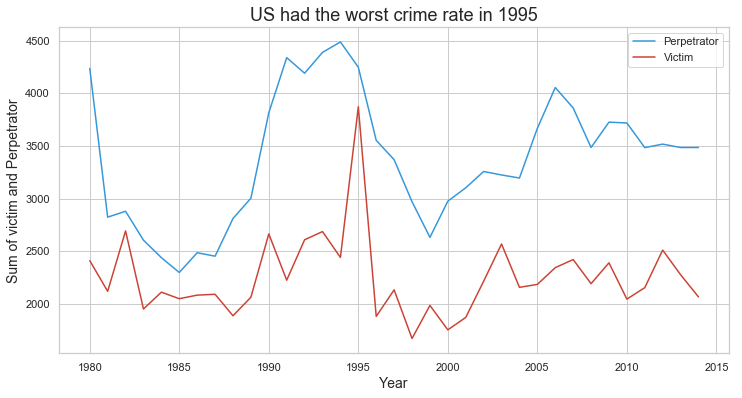

In [770]:
plt.figure(figsize=(12,6))
plt.plot(vp.Year,vp['Perpetrator Count'],color='#3498DB',label='Perpetrator')
plt.plot(vp.Year,vp['Victim Count'],color='#CB4335',label='Victim')
#plt.plot(vp.year,vp['Incident'],color='green',label='Incident')
plt.title('US had the worst crime rate in 1995',size=18)
plt.legend()
plt.xlabel('Year',size=14)
plt.ylabel('Sum of victim and Perpetrator',size=14)
plt.show() 


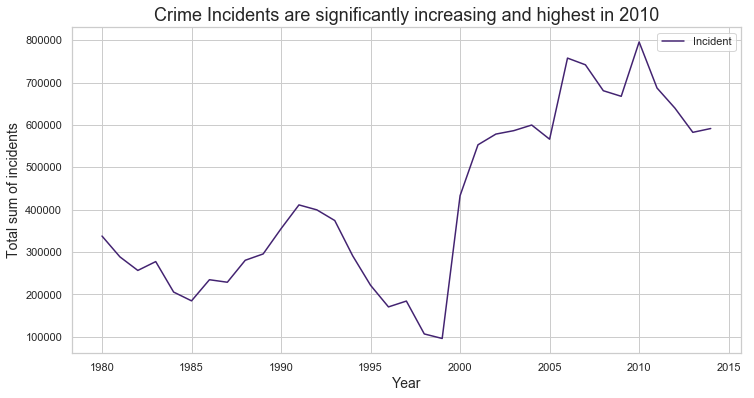

In [776]:
plt.figure(figsize=(12,6))
# plt.plot(vp.Year,vp['Perpetrator Count'],color='#3498DB',label='Perpetrator')
# plt.plot(vp.Year,vp['Victim Count'],color='#CB4335',label='Victim')
plt.plot(vp.Year,vp['Incident'],color='#432371',label='Incident')  
plt.title('Crime Incidents are significantly increasing and highest in 2010',size=18)
plt.legend()
plt.xlabel('Year',size=14)
plt.ylabel('Total sum of incidents',size=14)
plt.show() 

Why were the number of crime incidents very low in 2000 ?


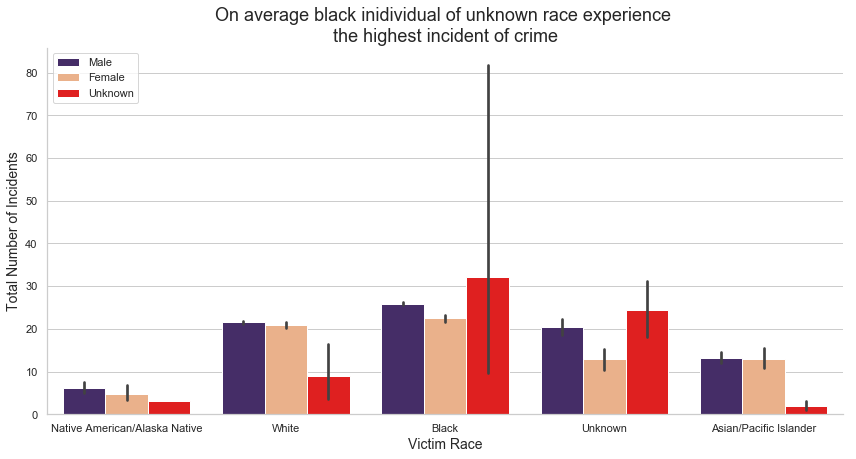

In [427]:

sns.set(style='whitegrid')
sns.catplot(x='Victim Race',
            y='Incident',
            kind='bar',
            height=6, # makes the height 6 units high
            aspect=2, # height should be 2 times width
            data=df,
            hue='Victim Sex',
            legend=False, # remove default legend
           palette=['#432371',"#FAAE7B",'red'])
plt.xlabel('Victim Race',size=14)
plt.ylabel('Total Number of Incidents',size=14)
plt.title('On average black inidividual of unknown race experience \n the highest incident of crime ',size=18)
plt.legend(loc='upper left')
plt.show() 

In [ ]:
#      sns.scatterplot(df['Victim Age'],
#                     df['Perpetrator Age'],
#                     hue=df['Victim Sex'])

In [ ]:
%pip install geopandas   


In [140]:
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [ ]:
# Map visualization 

In [338]:
df.head(4) 

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI


In [448]:

ct = pd.crosstab(df['Victim Race'],
                 df['Victim Sex'],
                margins=True,
                margins_name='Total')


In [449]:
ct 

Victim Sex,Female,Male,Unknown,Total
Victim Race,,,,
Asian/Pacific Islander,2953,6935,2,9890
Black,52083,247775,41,299899
Native American/Alaska Native,1218,3348,1,4567
Unknown,1352,4439,885,6676
White,85739,231628,55,317422
Total,143345,494125,984,638454


In [457]:

ct2 = pd.crosstab(df['Victim Race'],
                 df['Victim Sex'],
                margins=True,
                margins_name='Total',
                normalize='columns')*100 # to percentage 


In [458]:
ct2

Victim Sex,Female,Male,Unknown,Total
Victim Race,,,,
Asian/Pacific Islander,2.060065,1.403491,0.203252,1.549054
Black,36.334019,50.144194,4.166667,46.972687
Native American/Alaska Native,0.849698,0.677561,0.101626,0.715322
Unknown,0.943179,0.898356,89.939024,1.045651
White,59.813038,46.876398,5.589431,49.717286


In [479]:
ct3 = pd.crosstab(df['Crime Type'],[df['Victim Sex'],df['Victim Race']],
                 margins=True,
                  margins_name='Total'
                 )

In [480]:
ct3 

Victim Sex                                 Female         \
Victim Race                Asian/Pacific Islander  Black   
Crime Type                                                 
Manslaughter by Negligence                     40    610   
Murder or Manslaughter                       2913  51473   
Total                                        2953  52083   

Victim Sex                                                               \
Victim Race                Native American/Alaska Native Unknown  White   
Crime Type                                                                
Manslaughter by Negligence                            40      10   1548   
Murder or Manslaughter                              1178    1342  84191   
Total                                               1218    1352  85739   

Victim Sex                                   Male          \
Victim Race                Asian/Pacific Islander   Black   
Crime Type                                                  
Manslaughter by Negligence                     74    2056   
Murder or Manslaughter                       6861  245719   
Total                                        6935  247775   

Victim Sex                                                                \
Victim Race                Native American/Alaska Native Unknown   White   
Crime Type                                                                 
Manslaughter by Negligence                           103      26    4598   
Murder or Manslaughter                              3245    4413  227030   
Total                                               3348    4439  231628   

Victim Sex                                Unknown        \
Victim Race                Asian/Pacific Islander Black   
Crime Type                                                
Manslaughter by Negligence                      0     0   
Murder or Manslaughter                          2    41   
Total                                           2    41   

Victim Sex                                                               Total  
Victim Race                Native American/Alaska Native Unknown White          
Crime Type                                                                      
Manslaughter by Negligence                             0      10     1    9116  
Murder or Manslaughter                                 1     875    54  629338  
Total                                                  1     885    55  638454

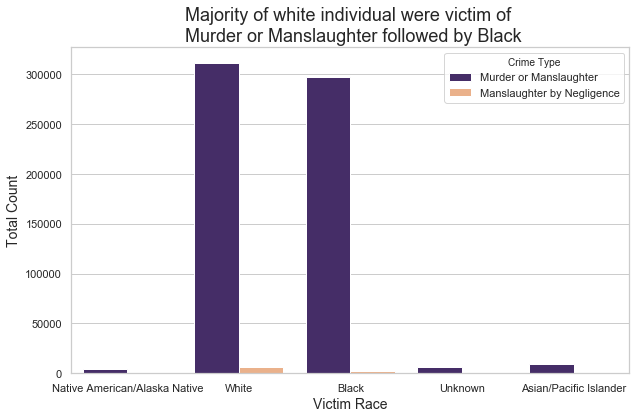

In [774]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,
              x='Victim Race',
              #y='Crime Type',
              hue='Crime Type',
              palette=['#432371',"#FAAE7B"] 
             )
plt.xlabel('Victim Race',size=14)
plt.ylabel('Total Count',size=14)
plt.title('Majority of white individual were victim of \n Murder or Manslaughter followed by Black',size=18)
plt.show() 


In [525]:
df.head(3)

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI


In [527]:
df['Victim Count'].min(),df['Victim Count'].max() 

(0, 10)

In [528]:
df['Perpetrator Count'].min(),df['Perpetrator Count'].max() 

(0, 10)

In [543]:
ct4= pd.crosstab(df['Weapon'],df['Crime Type'],normalize='columns',margins=True).round(2)*100    

In [546]:
ct4 

Crime Type,Manslaughter by Negligence,Murder or Manslaughter,All
Weapon,,,
Blunt Object,7.0,11.0,11.0
Drowning,2.0,0.0,0.0
Drugs,3.0,0.0,0.0
Explosives,0.0,0.0,0.0
Fall,0.0,0.0,0.0
Fire,2.0,1.0,1.0
Firearm,5.0,7.0,7.0
Gun,0.0,0.0,0.0
Handgun,40.0,50.0,50.0


In [579]:
#ct5 = pd.crosstab(df['Crime Type'],df['Crime Solved'])


ct5 = pd.crosstab(df['Agency Type'],
                  df['Crime Type'],
                  
                   
                 )  

In [580]:
ct5 

Crime Type,Manslaughter by Negligence,Murder or Manslaughter
Agency Type,,
County Police,382,22311
Municipal Police,5819,487207
Regional Police,11,224
Sheriff,2475,102847
Special Police,73,2816
State Police,352,13883
Tribal Police,4,50


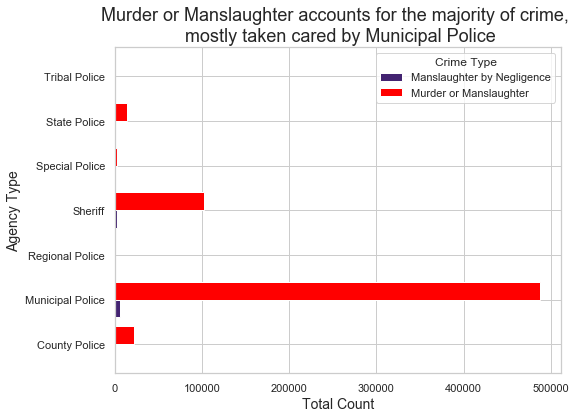

In [603]:

ct5.plot(kind='barh', 
         #stacked=True, 
         color=['#432371','red'],
         width=0.8,  
         figsize=(8,6) # (x-axis,y-axis)
         )
plt.xlabel('Total Count',size=14)
plt.ylabel('Agency Type',size=14)
plt.title('Murder or Manslaughter accounts for the majority of crime, \n mostly taken cared by Municipal Police',size=18)
plt.show() 

In [ ]:
# which race is associated with carryiyng out higher number of crime? 

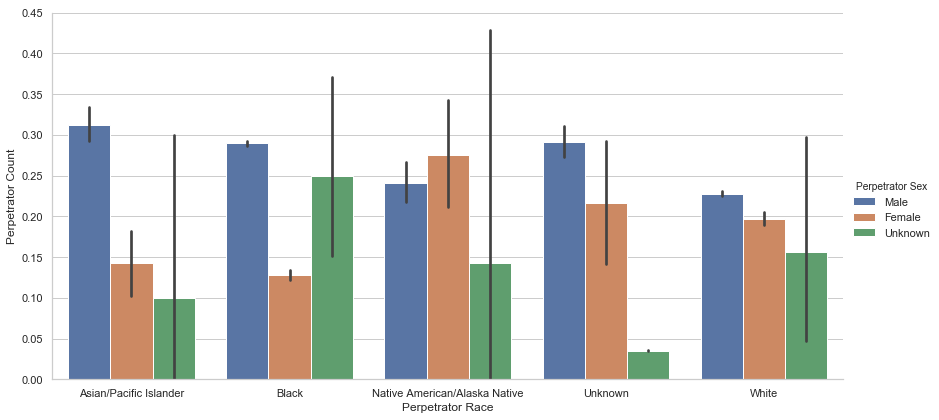

In [545]:
sns.catplot(x='Perpetrator Race',
           y='Perpetrator Count',
           kind='bar', 
           height=6,
            aspect=2,
            hue='Perpetrator Sex', 
           data=df.sort_values('Perpetrator Race')) 

In [604]:
df.head(2)

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI


In [ ]:
# Lets group by race see which race are responsible for higher number of victim count

In [639]:
Perpetrator_Count_greater_than_zero = df[df['Perpetrator Count'] > 0 ]

In [641]:
Perpetrator_Count_greater_than_zero.head() 

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
9,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,3,Murder or Manslaughter,Yes,Male,38,White,Unknown,Male,40.0,Unknown,Unknown,Unknown,Firearm,0,1,FBI
10,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,July,1,Murder or Manslaughter,No,Male,36,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
17,AK00103,Juneau,Municipal Police,Juneau,Alaska,1980,November,1,Murder or Manslaughter,Yes,Male,33,Native American/Alaska Native,Unknown,Male,23.0,Native American/Alaska Native,Unknown,Brother,Blunt Object,0,1,FBI
54,AL00100,Jefferson,Sheriff,Jefferson,Alabama,1980,July,3,Murder or Manslaughter,Yes,Male,33,Black,Not Hispanic,Male,26.0,Black,Not Hispanic,Acquaintance,Handgun,0,1,FBI


In [659]:
gp_prace = Perpetrator_Count_greater_than_zero.groupby(by='Perpetrator Race').sum ().reset_index()      

In [660]:
gp_prace 

,Perpetrator Race,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
0,Asian/Pacific Islander,2039041,12280,28983,23028.0,369,1787
1,Black,75721313,982465,1206264,780367.0,6104,58199
2,Native American/Alaska Native,1108594,3386,19233,13954.0,64,886
3,Unknown,14494773,128286,267227,16349.0,3231,8360
4,White,65623469,672997,1110248,808737.0,7279,49025


In [755]:
# gp_prace = gp_prace.sort_values(['Perpetrator Count']).reset_index(drop=True)
# sns.catplot(x='Perpetrator Race',
#             y= 'Perpetrator Count',
#            data=gp_prace,
#             height=6,
#             aspect=2,
#             order=["Black", "White",'Unknown','Asian/Pacific Islander','Native American/Alaska Native'],
#             palette=['#432371',"#FAAE7B",'red','#3498DB','#F4D03F'],  
#              #markers=["^", "o"], 
#             #linestyles=["-", "--"],
#             #hue='Perpetrator Race', 
#            kind='bar') 
# plt.xlabel('Perpetrator Race',size=14)
# plt.ylabel('Total Count Of Perpetrator',size=14)
# plt.title('Sum total of black Perpetrator were highest among other reace..',size=18) 




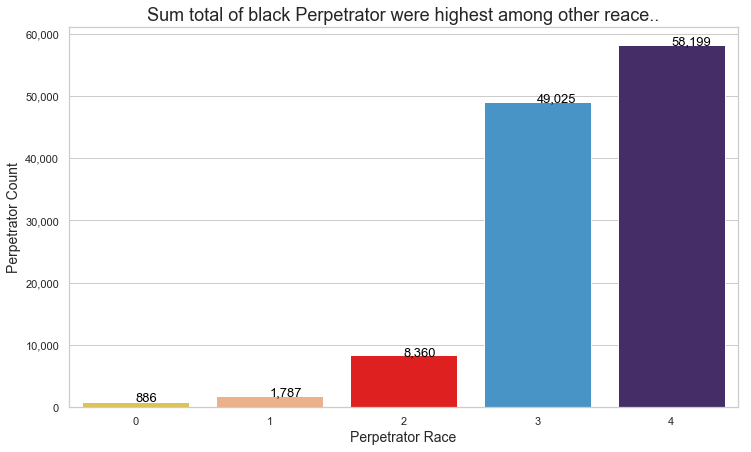

In [754]:
plt.figure(figsize=(12,7))   
# plot barh chart with index as x values
ax = sns.barplot(gp_prace.index,  
                 gp_prace['Perpetrator Count'],
                 palette=['#F4D03F',"#FAAE7B",'red','#3498DB','#432371'])

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
for i, v in enumerate(gp_prace["Perpetrator Count"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='black',size=13) 
plt.title('Sum total of black Perpetrator were highest among other reace..',size=18)
plt.xlabel('Perpetrator Race',size=14)
plt.ylabel('Perpetrator Count',size=14) 
plt.show()


In [762]:
df_imputed.head() 

,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
0,1980,1,14,15,0,0
1,1980,1,43,42,0,0
2,1980,2,30,0,0,0
3,1980,1,43,42,0,0
4,1980,2,30,0,0,1


### EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b8ea00710>,
      dtype=object)

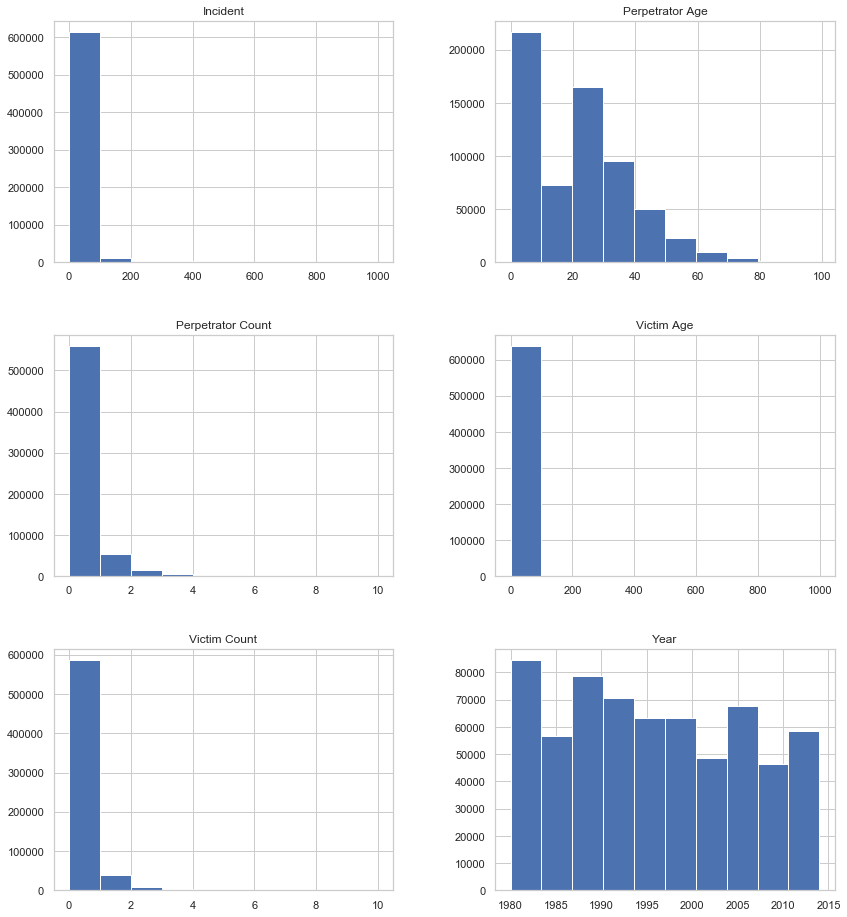

In [763]:
# histogram of all int features 
df_imputed.hist(bins=10,figsize=(14,16),layout=(3,2)) 

_Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships_.

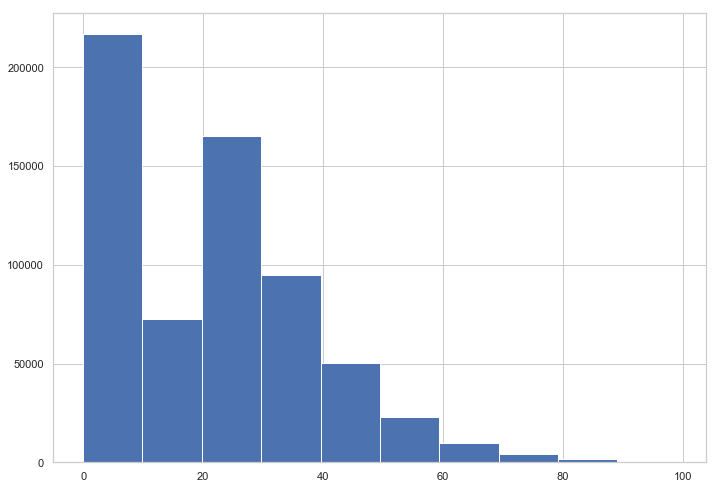

In [433]:
df['Perpetrator Age'].hist() 

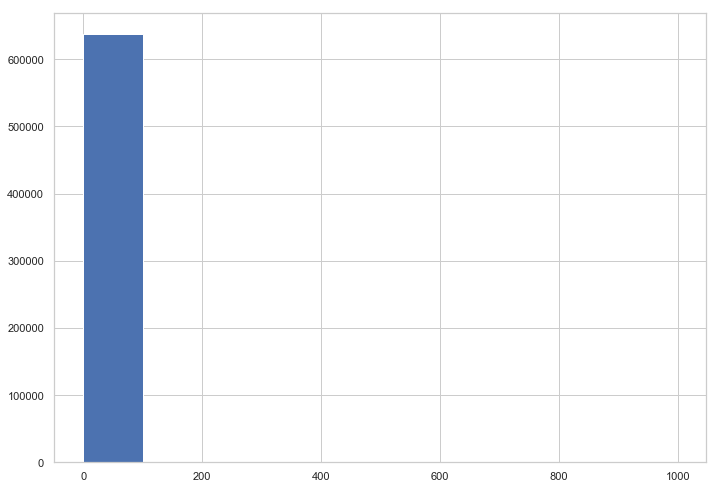

In [439]:
df['Victim Age'].hist()  

 There is clearly something wrong this data

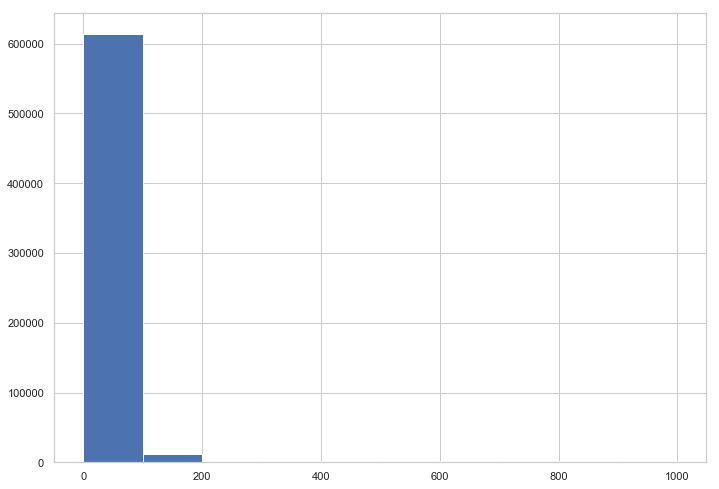

In [507]:
df['Incident'].hist()

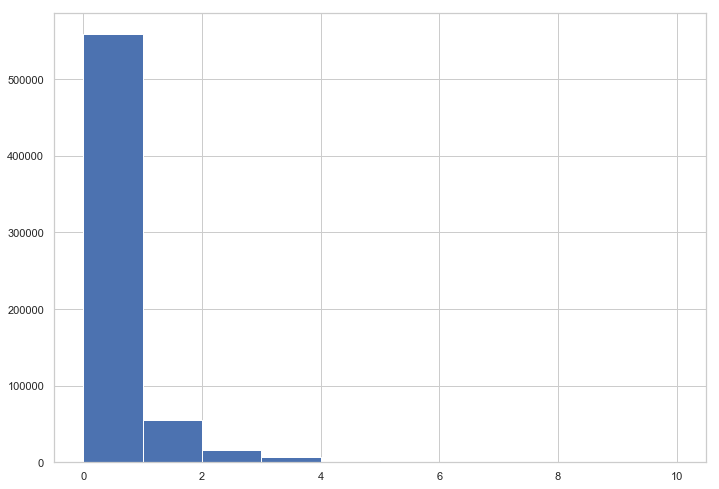

In [508]:
df['Perpetrator Count'].hist() 

# Discoveries

# Exceptional Work